In this notebook I will analyze binary netron stars and their coalescence time

In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
# usually the recommended one that is part of the cluster

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
# reading in the HDF5 file
pathToNS_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_Large.h5' #path of the hdf5 file

Data_3 = h5.File(pathToNS_H5)

In [3]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
DCOs = pd.DataFrame() # making a pandas dataframe

for key in Data_3["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCOs[key] = Data_3["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [4]:
DCOs

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
0,0,2.747892e+08,0.928587,0,b'2 ',b'2 ',5.511094,1.788686,0,0.013834,...,0,7200001,2.691932,14,13,10.398387,0.000000,0.00000,0.0,-0.006002
1,0,1.852794e+12,0.055807,0,b'NA ',b'NA ',43.617816,33.901606,0,0.000101,...,0,7200003,28.561915,14,14,4.071356,0.000000,0.00000,0.0,-0.031036
2,0,5.014118e+03,0.013558,0,b'2 ',b'2 ',10.833820,13.714816,1,0.000292,...,0,7200005,0.086784,14,14,9.015024,0.000000,0.00000,0.0,-0.001291
3,1,9.207830e+02,0.381758,0,b'NA ',b'4 ',16.517994,4.623529,1,0.000105,...,0,7200006,0.053178,14,14,9.295875,0.000000,0.00000,0.0,-0.000239
4,1,1.575138e+03,0.561540,0,b'NA ',b'4 ',15.958809,7.610886,1,0.000307,...,0,7200008,0.085155,14,14,7.526046,0.000000,0.00000,0.0,-0.000887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394439,0,2.010216e+03,0.001999,0,b'1-2 ',b'2 ',20.929215,29.098811,1,0.001019,...,0,7699976,0.117380,14,14,6.773217,0.000000,0.00000,0.0,-0.000011
2394440,1,8.707239e+02,0.179786,0,b'2 ',b'4-8 ',9.891114,1.655827,1,0.000445,...,0,7699984,0.027508,14,13,14.814675,0.000943,-1.76627,0.0,0.000000
2394441,0,2.005088e+02,0.961615,0,b'2 ',b'2 ',8.870352,1.481376,1,0.000529,...,0,7699985,0.152412,14,13,15.287458,0.000000,0.00000,0.0,-0.000271
2394442,1,3.565083e+01,0.173182,0,b'2 ',b'4 ',14.642290,5.241642,1,0.002515,...,0,7699988,0.020812,14,14,8.598717,0.000000,0.00000,0.0,-0.004082


Now we only want to select for binary neutron star systems

In [5]:
NS_bool = np.logical_and(DCOs['Stellar_Type(1)']==13,DCOs['Stellar_Type(2)']==13)

In [6]:
DCOs_NS = DCOs[NS_bool]
DCOs_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
135,1,1290.888074,0.478499,0,b'5 ',b'8 ',1.277616,1.277584,1,0.019039,...,0,7200446,0.014269,13,13,20.762234,0.000032,-1.234905,0.0,0.000000
163,1,892032.868288,0.455978,0,b'2 ',b'4-8 ',1.260006,1.277584,0,0.000247,...,0,7200513,0.071085,13,13,45.930452,0.000006,-1.036399,0.0,0.000000
175,1,13.637209,0.391140,0,b'2 ',b'4-8 ',1.260118,1.277584,1,0.000621,...,0,7200542,0.004192,13,13,37.853619,0.000118,-1.502255,0.0,0.000000
584,1,5.971833,0.428404,0,b'2 ',b'4-8 ',1.260170,1.277584,1,0.001105,...,0,7201879,0.003521,13,13,39.146374,0.000170,-1.586152,0.0,0.000000
595,1,12.540004,0.465046,0,b'2 ',b'4-8 ',1.260101,1.277584,1,0.000447,...,0,7201909,0.004393,13,13,37.405071,0.000101,-1.545267,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394063,1,34.366000,0.721856,0,b'4-8 ',b'8 ',1.333267,1.795183,1,0.002040,...,0,7698724,0.010093,13,13,20.991124,0.000033,-1.615593,0.0,0.000000
2394199,1,4.019679,0.261607,0,b'2 ',b'4-8 ',1.260165,1.277584,1,0.000200,...,0,7699154,0.002842,13,13,38.851617,0.000165,-1.554912,0.0,0.000000
2394270,1,11.158284,0.865659,0,b'4-8 ',b'NA ',1.277584,1.277584,1,0.000104,...,0,7699379,0.011403,13,13,37.856397,0.000000,0.000000,0.0,-0.000027
2394290,1,63.301595,0.465590,0,b'4-8 ',b'8 ',1.277647,1.277584,1,0.003532,...,0,7699443,0.006623,13,13,36.832275,0.000063,-1.432793,0.0,0.000000


Let's now calculate the coalescence time of these binary NS just to make sure my method matches that of COMPAS'

In [16]:
# let's now make the definition for the coalescence time (no variations for the very small or very larger eccentiricies)

def tgw(a,e,M1,M2):
    return ((((5*((a*u.m)**4)*(const.c**5))/(256*(const.G**3)*(M1*u.kg)*(M2*u.kg)*((M1*u.kg)+(M2*u.kg))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

In [17]:
# let's check the units of things just to make sure we are making correct conversions
# let's first look at the units of some parameters to see if anything must be converted
DCO_3 = Data_3['BSE_Double_Compact_Objects']
print(DCO_3['Mass(1)'].attrs['units']) 
print(DCO_3['SemiMajorAxis@DCO'].attrs['units'])
print(DCO_3['Coalescence_Time'].attrs['units'])

b'Msol'
b'AU'
b'Myr'


In [9]:
Coalescnece_Time = tgw((DCOs_NS['SemiMajorAxis@DCO'])*(1.496e11),(DCOs_NS['Eccentricity@DCO']),(DCOs_NS['Mass(1)'])*(1.989e30),(DCOs_NS['Mass(2)'])*(1.989e30))

In [10]:
# do the below for th wwhole colun rathe than a for loop

In [10]:
# # let's just look at double helium WDs to start, this cell (because of the for loop) takes about 3 minsa to run

# # let's gather the semi major axis
# a_wd = np.array(DCOs_NS['SemiMajorAxis@DCO'])*(1.496e11) # converting from au to meters

# # the eccentricites
# e_wd = np.array(DCOs_NS['Eccentricity@DCO'])

# # masses
# M1_wd = np.array(DCOs_NS['Mass(1)'])*(1.989e30) # converting from solar masses to kg
# M2_wd = np.array(DCOs_NS['Mass(2)'])*(1.989e30)

# # let's calculate the coalescence time

# time_gw = [] # this list will be th ecoalescence time of all of the WD binaries

# for seeds in range(DCOs_NS.shape[0]): # looping though all of the binaries

#     t_gw = tgw(a_wd[seeds],e_wd[seeds],M1_wd[seeds],M2_wd[seeds])
#     time_gw.append(t_gw.value)


In [11]:
time_gw = np.array(time_gw)

In [12]:
# let's grab the coalescence time COMPAS calculated

coalescence_COMPAS = DCOs_NS['Coalescence_Time']


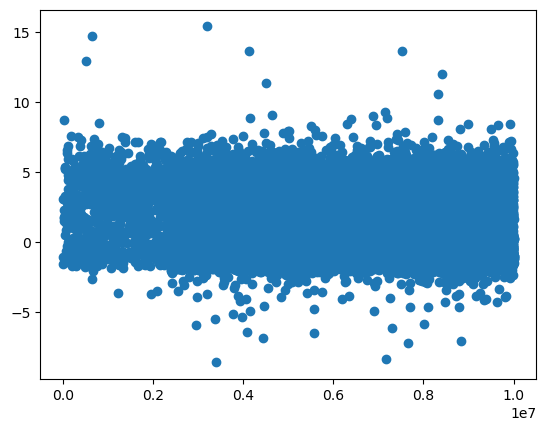

In [13]:
plt.scatter(DCOs_NS['SEED'],np.log10((abs(Coalescnece_Time-coalescence_COMPAS))))
# plt.ylim(-6,6)

Text(0.5, 1.0, "Checking COMPAS' Coalescence Time in the Larger Simulation")

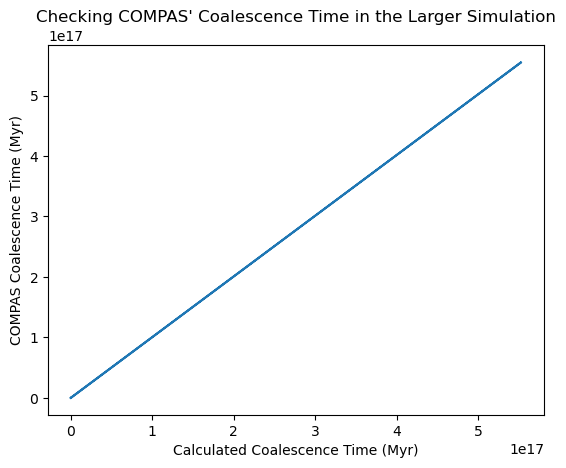

In [13]:
# plotting these against each other just to see if there is any extreme variation 
plt.plot(time_gw,coalescence_COMPAS)
plt.xlabel("Calculated Coalescence Time (Myr)")
plt.ylabel("COMPAS Coalescence Time (Myr)")
plt.title("Checking COMPAS' Coalescence Time in the Larger Simulation")
# this mostly looks like a linear line so these values are pretty similar

Since this is so different, let't take just one seed and compare the mass to that of the calculated COMAPS seed

#### Let's do a deeper analysis into why my coalescence time and COMPAS are different

In [38]:
# let's first find where the eccentricity is close to zero so we can also use the peters paper to comapre
small_eccen = DCOs_NS.loc[DCOs_NS['Eccentricity@DCO']<0.01]
small_eccen

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
281840,1,5.412598e+03,0.007853,0,b'2 ',b'3-8 ',1.260032,1.277584,1,0.015057,...,0,2597238,0.016181,13,13,41.336264,0.000032,-1.000419,0.0,0.0
455097,1,3.183779e+06,0.006547,0,b'2 ',b'5-8 ',1.260003,1.277584,0,0.000569,...,0,4551326,0.079684,13,13,44.412382,0.000003,-0.986651,0.0,0.0
528949,1,1.401921e+02,0.004321,0,b'5 ',b'8 ',1.277669,1.277584,1,0.028715,...,0,6383892,0.006525,13,13,25.891691,0.000085,-1.156576,0.0,0.0
569739,1,4.114325e-01,0.002715,0,b'5 ',b'8 ',1.277644,1.277584,1,0.007612,...,0,7911184,0.001519,13,13,39.186761,0.000060,-1.064981,0.0,0.0
647725,1,6.407597e+02,0.001710,0,b'5 ',b'8 ',1.277609,1.277584,1,0.023026,...,0,8461694,0.009540,13,13,20.156465,0.000025,-1.199725,0.0,0.0
712955,1,1.690853e+01,0.009808,0,b'2 ',b'4-8 ',1.260182,1.277584,1,0.000202,...,0,7372557,0.003826,13,13,46.159730,0.000182,-1.284255,0.0,0.0
876818,1,7.001432e+01,0.007661,0,b'5 ',b'8 ',1.329082,1.277584,1,0.008183,...,0,8299454,0.005567,13,13,23.564770,0.000152,-1.188763,0.0,0.0
930942,1,5.104129e+00,0.005893,0,b'2 ',b'4-8 ',1.260256,1.277584,1,0.000292,...,0,8373146,0.002836,13,13,41.761169,0.000256,-1.388837,0.0,0.0
991363,1,3.392400e+02,0.009907,0,b'2 ',b'5-8 ',1.260039,1.277584,1,0.000274,...,0,6267059,0.008096,13,13,41.290795,0.000039,-1.208280,0.0,0.0
1115831,1,3.935952e+03,0.003147,0,b'2 ',b'5-8 ',1.260020,1.277584,1,0.000371,...,0,2762693,0.014941,13,13,42.241783,0.000020,-1.129755,0.0,0.0


Let's look at the sig figs of the separations, masses, and eccentricities

In [118]:
def count_significant_figures(number):
    # Convert number to string representation
    num_str = str(number)
    
    # Remove any trailing zeros and decimal point
    num_str = num_str.rstrip('0').rstrip('.')
    
    # Count the remaining digits
    sig_fig_count = len(num_str.replace('.', '').replace('-', ''))
    
    return sig_fig_count


print(f"Number: {small_eccen['Eccentricity@DCO'].iloc[0]}, Significant figures: {count_significant_figures(small_eccen['Eccentricity@DCO'].iloc[1])}")
print(f"Number: {small_eccen['Mass(1)'].iloc[0]}, Significant figures: {count_significant_figures(small_eccen['Mass(1)'].iloc[1])}")
print(f"Number: {small_eccen['Mass(2)'].iloc[0]}, Significant figures: {count_significant_figures(small_eccen['Mass(2)'].iloc[1])}")
print(f"Number: {small_eccen['SemiMajorAxis@DCO'].iloc[0]}, Significant figures: {count_significant_figures(small_eccen['SemiMajorAxis@DCO'].iloc[1])}")


Number: 0.007853081589596814, Significant figures: 20
Number: 1.2600322526310024, Significant figures: 17
Number: 1.2775835252086558, Significant figures: 17
Number: 0.01618063732494544, Significant figures: 18


In [51]:
# def tgw_small(e,M1,M2):
#     return (((((1-e**2)/(e**(12/19)))*(1+(121/304)*e**2)**(-870/2299))**4)*e**(48/19))/((4*(64/5)*(const.G**3)*(M1*u.kg*M2*u.kg*(M1*u.kg+M2*u.kg)))/(const.c**5))

Let's use the near circular case for e<0.01 as seen above and test th first element in this to how off we are from compas

In [84]:
# let's now make the definition for the coalescence time (no variations for the very small or very larger eccentiricies)

def tgw(a,e,M1,M2):
    return ((((5*((a*u.m)**4)*(const.c**5))/(256*(const.G**3)*(M1*u.kg)*(M2*u.kg)*((M1*u.kg)+(M2*u.kg))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

In [71]:
# this is based on Peters 5.10
def tgw_small(a,e,M1,M2):
    return ((a*u.m)**4)/(((64/5)*(4*(const.G**3)*((M1*u.kg)*(M2*u.kg)*((M1*u.kg)+(M2*u.kg))))/(const.c**5)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

In [72]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [97]:
fist_mandel_col = tgw((small_eccen['SemiMajorAxis@DCO'].iloc[1])*(1.496e11),(small_eccen['Eccentricity@DCO'].iloc[1]),(small_eccen['Mass(1)'].iloc[1])*(1.989e30),(small_eccen['Mass(2)'].iloc[1])*(1.989e30)).value

In [98]:
first_col_tim = tgw_small((small_eccen['SemiMajorAxis@DCO'].iloc[1])*(1.496e11),(small_eccen['Eccentricity@DCO'].iloc[1]),(small_eccen['Mass(1)'].iloc[1])*(1.989e30),(small_eccen['Mass(2)'].iloc[1])*(1.989e30)).value

In [99]:
fist_mandel_col

3168573.0123322215

In [100]:
first_col_tim

3169048.3720910107

In [102]:
small_eccen['Coalescence_Time'].iloc[1]

3183778.8420165386

In [104]:
def count_significant_figures(number):
    # Convert number to string representation
    num_str = str(number)
    
    # Remove any trailing zeros and decimal point
    num_str = num_str.rstrip('0').rstrip('.')
    
    # Count the remaining digits
    sig_fig_count = len(num_str.replace('.', '').replace('-', ''))
    
    return sig_fig_count

# # Example usage:
# num1 = 123.45
# num2 = 0.00340
# num3 = 100.0

print(f"Number: {small_eccen['Coalescence_Time'].iloc[1]}, Significant figures: {count_significant_figures(small_eccen['Coalescence_Time'].iloc[1])}")
print(f"Number: {first_col_tim}, Significant figures: {count_significant_figures(first_col_tim)}")
print(f"Number: {fist_mandel_col}, Significant figures: {count_significant_figures(fist_mandel_col)}")


Number: 3183778.8420165386, Significant figures: 17
Number: 3169048.3720910107, Significant figures: 17
Number: 3168573.0123322215, Significant figures: 17


In [106]:
abs(small_eccen['Coalescence_Time'].iloc[1]-fist_mandel_col)

15205.829684317112

In [107]:
abs(fist_mandel_col-first_col_tim)

475.35975878918543

In [109]:
mandel_col = tgw((small_eccen['SemiMajorAxis@DCO'])*(1.496e11),(small_eccen['Eccentricity@DCO']),(small_eccen['Mass(1)'])*(1.989e30),(small_eccen['Mass(2)'])*(1.989e30))

In [112]:
col_tim = tgw_small((small_eccen['SemiMajorAxis@DCO'])*(1.496e11),(small_eccen['Eccentricity@DCO']),(small_eccen['Mass(1)'])*(1.989e30),(small_eccen['Mass(2)'])*(1.989e30))

Text(0, 0.5, 'Log10 Difference')

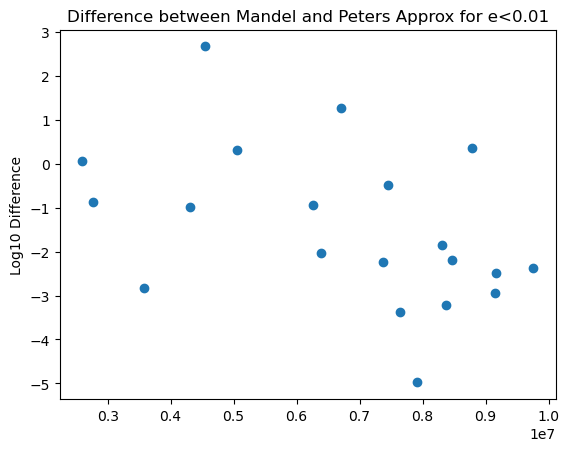

In [116]:
plt.scatter(small_eccen['SEED'],np.log10((abs(mandel_col-col_tim))))
# plt.ylim(-6,6)
plt.title("Difference between Mandel and Peters Approx for e<0.01")
plt.ylabel("Log10 Difference")

Text(0, 0.5, 'Log10 Difference')

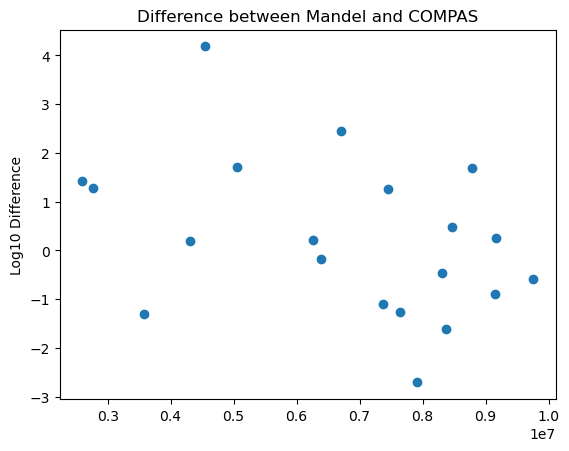

In [117]:
plt.scatter(small_eccen['SEED'],np.log10((abs(mandel_col-small_eccen['Coalescence_Time']))))
# plt.ylim(-6,6)
plt.title("Difference between Mandel and COMPAS")
plt.ylabel("Log10 Difference")

In [76]:
# let's make a definition for the circular case (5.10 Peters 1964)

In [14]:
# let's look at these values in more depth to see the variations in times
DCOs_NS.insert(2,"Calculated_Coalescence_Time",time_gw,True)

In [15]:
# in case you run the cell above more than once here is a way to remove the extra column
# DCOs_NS = DCOs_NS.drop('Calculated_Coalescence_Time', axis=1)

In [16]:
DCOs_NS

,CE_Event_Counter,Coalescence_Time,Calculated_Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
135,1,1290.888074,1284.722751,0.478499,0,b'5 ',b'8 ',1.277616,1.277584,1,...,0,7200446,0.014269,13,13,20.762234,0.000032,-1.234905,0.0,0.000000
163,1,892032.868288,887772.490748,0.455978,0,b'2 ',b'4-8 ',1.260006,1.277584,0,...,0,7200513,0.071085,13,13,45.930452,0.000006,-1.036399,0.0,0.000000
175,1,13.637209,13.572077,0.391140,0,b'2 ',b'4-8 ',1.260118,1.277584,1,...,0,7200542,0.004192,13,13,37.853619,0.000118,-1.502255,0.0,0.000000
584,1,5.971833,5.943312,0.428404,0,b'2 ',b'4-8 ',1.260170,1.277584,1,...,0,7201879,0.003521,13,13,39.146374,0.000170,-1.586152,0.0,0.000000
595,1,12.540004,12.480112,0.465046,0,b'2 ',b'4-8 ',1.260101,1.277584,1,...,0,7201909,0.004393,13,13,37.405071,0.000101,-1.545267,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394063,1,34.366000,34.201866,0.721856,0,b'4-8 ',b'8 ',1.333267,1.795183,1,...,0,7698724,0.010093,13,13,20.991124,0.000033,-1.615593,0.0,0.000000
2394199,1,4.019679,4.000481,0.261607,0,b'2 ',b'4-8 ',1.260165,1.277584,1,...,0,7699154,0.002842,13,13,38.851617,0.000165,-1.554912,0.0,0.000000
2394270,1,11.158284,11.104991,0.865659,0,b'4-8 ',b'NA ',1.277584,1.277584,1,...,0,7699379,0.011403,13,13,37.856397,0.000000,0.000000,0.0,-0.000027
2394290,1,63.301595,62.999265,0.465590,0,b'4-8 ',b'8 ',1.277647,1.277584,1,...,0,7699443,0.006623,13,13,36.832275,0.000063,-1.432793,0.0,0.000000


In [18]:
len(np.where(abs(DCOs_NS['Coalescence_Time']-DCOs_NS["Calculated_Coalescence_Time"])>0)[0]) # where there is a nonzero difference in the coalescence time

31649

In [16]:
len(np.where(abs(DCOs_NS['Coalescence_Time']-DCOs_NS["Calculated_Coalescence_Time"])<10)[0])
# only about 60% of the times have a difference of 10 Myr

19316

In [17]:
# Data_3.close()

#### Let's do this again but for the low mass simulation from COMPAS

In [18]:
# reading in the HDF5 file
pathToLM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToLM_H5)

In [19]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
DCOs2 = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCOs2[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

Now we only want to select for binary neutron star systems

In [21]:
NS_bool2 = np.logical_and(DCOs2['Stellar_Type(1)']==13,DCOs2['Stellar_Type(2)']==13)

In [23]:
DCOs2_NS = DCOs2[NS_bool2]
DCOs2_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
14,1,5.022372e+04,0.095905,0,b'2 ',b'4-8 ',1.260009,1.277584,0,0.000256,...,0,409284,0.028468,13,13,47.267532,0.000009,-1.038851,0.0,0.000000
15,1,4.748315e+00,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,0.000323,...,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.000000
23,1,3.162000e+00,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,0.000511,...,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.000000
29,1,3.406543e+01,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,0.001198,...,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.000000
44,1,1.615129e+05,0.878717,0,b'2 ',b'4 ',1.260000,1.454858,0,0.008790,...,0,646959,0.141550,13,13,33.597505,0.000000,0.000000,0.0,-0.002908
60,1,3.148303e+01,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,0.004774,...,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.000000
64,1,9.700190e+04,0.464283,0,b'2 ',b'5-8 ',1.260007,1.277584,0,0.006129,...,0,465375,0.041168,13,13,36.428816,0.000007,-1.165779,0.0,0.000000
70,1,5.241833e+05,0.155147,0,b'2 ',b'3-8 ',1.260007,1.277584,0,0.021052,...,0,473618,0.051850,13,13,36.441770,0.000007,-0.895173,0.0,0.000000
75,1,8.582748e+01,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,0.000840,...,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.000000
86,1,1.563690e+03,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,0.007143,...,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.000000


In [24]:
# let's check the units of things just to make sure we are making correct conversions
# let's first look at the units of some parameters to see if anything must be converted
DCO_2 = Data_2['BSE_Double_Compact_Objects']
print(DCO_2['Mass(1)'].attrs['units']) 
print(DCO_2['SemiMajorAxis@DCO'].attrs['units'])
print(DCO_2['Coalescence_Time'].attrs['units'])

b'Msol'
b'AU'
b'Myr'


In [25]:
# let's just look at double helium WDs to start, this cell (because of the for loop) takes about 3 mins to run

# let's gather the semi major axis
a_wd2 = np.array(DCOs2_NS['SemiMajorAxis@DCO'])*(1.496e11) # converting from au to meters

# the eccentricites
e_wd2 = np.array(DCOs2_NS['Eccentricity@DCO'])

# masses
M1_wd2 = np.array(DCOs2_NS['Mass(1)'])*(1.989e30) # converting from solar masses to kg
M2_wd2 = np.array(DCOs2_NS['Mass(2)'])*(1.989e30)

# let's calculate the coalescence time

time_gw2 = [] # this list will be th ecoalescence time of all of the WD binaries

for seeds in range(DCOs2_NS.shape[0]): # looping though all of the binaries

    t_gw2 = tgw(a_wd2[seeds],e_wd2[seeds],M1_wd2[seeds],M2_wd2[seeds])
    time_gw2.append(t_gw2.value)


In [27]:
time_gw2 = np.array(time_gw2)

In [29]:
# let's grab the coalescence time COMPAS calculated

coalescence_COMPAS2 = DCOs2_NS['Coalescence_Time']

Text(0.5, 1.0, 'Checking the COMPAS Coalescence Time in the Low Mass Run')

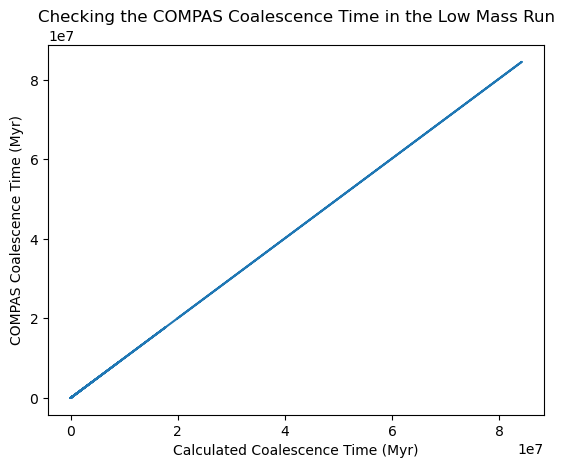

In [30]:
# plotting these against each other just to see if there is any extreme variation 
plt.plot(time_gw2,coalescence_COMPAS2)
plt.xlabel("Calculated Coalescence Time (Myr)")
plt.ylabel("COMPAS Coalescence Time (Myr)")
plt.title("Checking the COMPAS Coalescence Time in the Low Mass Run")
# this mostly looks like a linear line so these values are pretty similar

In [32]:
# let's look at these values in more depth to see the variations in times
DCOs2_NS.insert(2,"Calculated_Coalescence_Time",time_gw2,True)

In [34]:
# in case you run the cell above more than once here is a way to remove the extra column
# DCOs2_NS = DCOs2_NS.drop('Calculated_Coalescence_Time', axis=1)

In [35]:
DCOs2_NS

,CE_Event_Counter,Coalescence_Time,Calculated_Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,...,Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2)
14,1,5.022372e+04,4.998492e+04,0.095905,0,b'2 ',b'4-8 ',1.260009,1.277584,0,...,0,409284,0.028468,13,13,47.267532,0.000009,-1.038851,0.0,0.000000
15,1,4.748315e+00,4.725738e+00,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,...,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.000000
23,1,3.162000e+00,3.146965e+00,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,...,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.000000
29,1,3.406543e+01,3.390345e+01,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,...,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.000000
44,1,1.615129e+05,1.607449e+05,0.878717,0,b'2 ',b'4 ',1.260000,1.454858,0,...,0,646959,0.141550,13,13,33.597505,0.000000,0.000000,0.0,-0.002908
60,1,3.148303e+01,3.133334e+01,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,...,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.000000
64,1,9.700190e+04,9.654068e+04,0.464283,0,b'2 ',b'5-8 ',1.260007,1.277584,0,...,0,465375,0.041168,13,13,36.428816,0.000007,-1.165779,0.0,0.000000
70,1,5.241833e+05,5.216909e+05,0.155147,0,b'2 ',b'3-8 ',1.260007,1.277584,0,...,0,473618,0.051850,13,13,36.441770,0.000007,-0.895173,0.0,0.000000
75,1,8.582748e+01,8.541939e+01,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,...,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.000000
86,1,1.563690e+03,1.556255e+03,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,...,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.000000


In [37]:
len(np.where(abs(DCOs2_NS['Coalescence_Time']-DCOs2_NS["Calculated_Coalescence_Time"])<10)[0])
# only about 50% of the times have a difference of 10 Myr

17

In [ ]:
# Data_2.close()